In [32]:
from peaceful_pie.unity_comms import UnityComms
import argparse
import gym
from gym import Env
from gym.spaces import Box, MultiBinary,Discrete
import numpy as np
import os
from torch.utils.tensorboard import SummaryWriter
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import gym
from gym import spaces
from gym.wrappers import FrameStack
from collections import deque
# Import UnityComms from peaceful_pie.unity_comms
from peaceful_pie.unity_comms import UnityComms
from peaceful_pie.unity_comms import UnityComms
from peaceful_pie import ray_results_helper
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import os
import uuid

import torch
from torch import nn
from torchrl.collectors import MultiaSyncDataCollector
from torchrl.data import LazyMemmapStorage, MultiStep, TensorDictReplayBuffer
from torchrl.envs import (
    EnvCreator,
    ExplorationType,
    ParallelEnv,
    RewardScaling,
    StepCounter,
)
from torchrl.envs.libs.gym import GymEnv
from torchrl.envs.transforms import (
    CatFrames,
    Compose,
    GrayScale,
    ObservationNorm,
    Resize,
    ToTensorImage,
    TransformedEnv,
)
from torchrl.modules import DuelingCnnDQNet, EGreedyWrapper, QValueActor

from torchrl.objectives import DQNLoss, SoftUpdate
from torchrl.record.loggers.csv import CSVLogger
from torchrl.trainers import (
    LogReward,
    Recorder,
    ReplayBufferTrainer,
    Trainer,
    UpdateWeights,
)

In [34]:
import gym 
import retro
import numpy as np
import  gym
from gym import Env


from torch.utils.tensorboard import SummaryWriter
import retro
import cv2
from gym.spaces import Box,MultiBinary
import numpy as np
import optuna
import tqdm as notebook_tqdm
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder ,VecFrameStack
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [35]:
def unity_comms(port: int):
    unity_comms = UnityComms(port)
    return unity_comms


In [36]:
port = 5000  # Replace with your desired port number
unity_comms_instance = unity_comms(port)

In [37]:
unity_comms_instance 
unity_comms = unity_comms_instance

In [38]:
class MyVector3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

In [39]:
import numpy as np

In [40]:
import torch

class UnityEnv(Env):
    def __init__(self, unity_comms, i):
        self.unity_comms = unity_comms
        self.action_space = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])  # 15 possible actions
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)
        self.initial_position = None
        self.prev_position = None
        self.prev_velocity = 0
        self.frame_count = 0
        self.i = i


    def action(self):
        actions = {
            0: [np.array([1.0, 0.0, 0.0])],  # GoForward
            1: [np.array([-1.0, 0.0, 0.0])],  # GoReverse
            2: [np.array([0.0, 1.0, 0.0])],  # TurnLeft
            3: [np.array([0.0, -1.0, 0.0])],  # TurnRight
            4: [np.array([0.0, 0.0, 1.0])],  # Handbrake
            5: [np.array([1.0, 1.0, 0.0])],  # GoForward + TurnLeft
            6: [np.array([1.0, -1.0, 0.0])],  # GoForward + TurnRight
            7: [np.array([1.0, 0.0, 1.0])],  # GoForward + Handbrake
            8: [np.array([-1.0, 1.0, 0.0])],  # GoReverse + TurnLeft
            9: [np.array([-1.0, -1.0, 0.0])],  # GoReverse + TurnRight
            10: [np.array([-1.0, 0.0, 1.0])],  # GoReverse + Handbrake
            11: [np.array([1.0, 1.0, 1.0])],  # GoForward + TurnLeft + Handbrake
            12: [np.array([1.0, -1.0, 1.0])],  # GoForward + TurnRight + Handbrake
            13: [np.array([-1.0, 1.0, 1.0])],  # GoReverse + TurnLeft + Handbrake
            14: [np.array([-1.0, -1.0, 1.0])]  # GoReverse + TurnRight + Handbrake
        }
        return actions

    def step(self, action):
        if action.item() in self.action_space:
            action_methods = self.action()[action.item()]
            for method in action_methods:
                action_method = method.tolist()
                if action_method == [1.0, 0.0, 0.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                elif action_method == [-1.0, 0.0, 0.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                elif action_method == [0.0, 1.0, 0.0]:
                    getattr(self.unity_comms, f"TurnLeft_{self.i}")()
                elif action_method == [0.0, -1.0, 0.0]:
                    getattr(self.unity_comms, f"TurnRight_{self.i}")()
                elif action_method == [0.0, 0.0, 1.0]:
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [1.0, 1.0, 0.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                    getattr(self.unity_comms, f"TurnLeft_{self.i}")()
                elif action_method == [1.0, -1.0, 0.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                    getattr(self.unity_comms, f"TurnRight_{self.i}")()
                elif action_method == [1.0, 0.0, 1.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [-1.0, 1.0, 0.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                    getattr(self.unity_comms, f"TurnLeft_{self.i}")()
                elif action_method == [-1.0, -1.0, 0.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                    getattr(self.unity_comms, f"TurnRight_{self.i}")()
                elif action_method == [-1.0, 0.0, 1.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [1.0, 1.0, 1.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                    getattr(self.unity_comms, f"TurnLeft_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [1.0, -1.0, 1.0]:
                    getattr(self.unity_comms, f"GoForward_{self.i}")()
                    getattr(self.unity_comms, f"TurnRight_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [-1.0, 1.0, 1.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                    getattr(self.unity_comms, f"TurnLeft_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
                elif action_method == [-1.0, -1.0, 1.0]:
                    getattr(self.unity_comms, f"GoReverse_{self.i}")()
                    getattr(self.unity_comms, f"TurnRight_{self.i}")()
                    getattr(self.unity_comms, f"Handbrake_{self.i}")()
        else:
            raise ValueError("Invalid action index")


        self.prev_position = self.Get_position()
        self.prev_velocity = self.Get_velocity()

        position = self.Get_position()
        velocity = self.Get_velocity()
        # Concatenate the position and velocity to form the observation
        observation = np.array([position[0], position[1], velocity], dtype=np.float32)

        reward = self.Get_reward()
        done = self.done()

        # Update the info dictionary with relevant information
        info = {
            'episode_reward': reward,  # Replace with the actual episode reward
            'episode_length': self.frame_count,  # Replace with the actual episode length
            'current_observation': observation,
            'action_taken': action,
            'obstacle_visible': self.Is_obstacle_visible(),
            'reward_visible': self.Is_reward_visible(),
            'goal_reached': self.Goal(),
            'car_collision_detected': self.Get_carCollisionDetected(),
            'velocity_incremented': self.Check_valocity_increment(),
        }
        return observation, reward, done, info

    def RayCast(self):
        ray_results = getattr(self.unity_comms, f"GetRayCastsResults_{self.i}")()
        distance = np.array(ray_results['rayDistances'], dtype=np.float32)
        types = np.array(ray_results['rayHitObjectTypes'], dtype=np.int32)
        num_types = ray_results['NumObjectTypes']
        self.actual_result = ray_results_helper.ray_results_to_feature_np(
            ray_results_helper.RayResults(
                NumObjectTypes=num_types,
                rayDistances=distance,
                rayHitObjectTypes=types,
            )
        )  

        return self.actual_result
    

    def Is_obstacle_visible(self):
        actual_result=self.RayCast()
        obstacle_channel = actual_result[0]  # Extract the obstacle channel from the actual result
        if np.max(obstacle_channel) > 0:
            return True
        return False

    def Is_reward_visible(self):
        actual_result=self.RayCast()
        reward_channel = actual_result[1]  # Extract the reward channel from the actual result
        if np.max(reward_channel) > 0:
            return True
        return False

    def Goal(self):
        if self.Is_reward_visible() == True:
            goal_channel = self.actual_result[1]
            if np.max(goal_channel) > 1:
                return True
        return False


    def Get_reward(self):
        obstacle_penalty = -1.0  # Penalty for encountering an obstacle
        reward_bonus = .7 # Reward for finding a reward object
        goal_reward = 1  # Reward for reaching the goal
        car_collision_penalty = -1.0  # Penalty for colliding with the car
        valocity_reward = 0.1 #reward for moving forward

        reward = 0.0

        if self.Is_obstacle_visible()== True:
            reward += obstacle_penalty

        if self.Is_reward_visible()== True:
            reward += reward_bonus

        reward += self.Step_panalty()

        if self.Goal() == True:
            reward += goal_reward

        if self.Get_carCollisionDetected() == True:
            reward += car_collision_penalty

        if self.Check_valocity_increment()== True:
            reward += valocity_reward

        return reward

    def reset(self):
        self.RayCast()
        Reset_Car = getattr(self.unity_comms, f"ResetPosition_{self.i}")()  
        Reset_Agent = getattr(self.unity_comms, f"ResetPosition_Plane_{self.i}")()
        position =self.Get_position()
        position = np.array(position, dtype=np.float32)
        self.frame_count=0
        return position

    def done(self):
        if self.Get_carCollisionDetected() == True:
            self.frame_count=0
            return True
        elif self.Get_movingPlaneCollision() == True:
            self.frame_count=0
            return True
        elif self.Get_planeCollision() == True:
            self.frame_count=0
            return True
        elif self.Check_stuck() == True:
            self.frame_count=0
            return True
        else:
            self.frame_count += 1
            return False

    def Get_carCollisionDetected(self):
        collision_count = 0
        collision = collision = getattr(self.unity_comms, f"CarCollisionDetected_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count >=2:
                collision_count = 0
                return True

        return False
    
    def Get_movingPlaneCollision(self):
        collision_count = 0
        collision = getattr(self.unity_comms, f"GetMovingPlaneCollision_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count >= 1:
                collision_count = 0
                return True

        return False
    
    def Get_planeCollision(self):
        collision_count = 0
        collision = getattr(self.unity_comms, f"GetPlaneCollision_{self.i}")()
        if collision == 1:
            collision_count += 1
            if collision_count > 0:
                collision_count = 0
                return True

        return False
    
    
    def Get_rewardCollision(self):
        collision = getattr(self.unity_comms, f"GetRewardCollision_{self.i}")()
        self.rewardcollision = collision

    def Step_panalty(self):
        if self.done() == True:
            return -1
        else:
            return 0


    def Get_velocity(self):
        valocity =  getattr(self.unity_comms, f"CarSpeedUI_{self.i}")()
        return valocity

    def Check_valocity_increment(self):
        valocity = self.Get_velocity()
        if valocity > self.prev_velocity:
            self.prev_velocity = valocity
            return True
        else:
            return False

    def Check_stuck(self):
        position_threshold = 0.01
        consecutive_steps = 20
        position_counter = 0
        
        if self.prev_position is None:
            self.prev_position = self.get_position()

        for _ in range(consecutive_steps):
            x, y, z = self.Get_position()

            position_diff = np.linalg.norm(np.array([x, y, z]) - np.array(self.prev_position))
            if position_diff < position_threshold:
                position_counter += 1
            else:
                position_counter = 0

            self.prev_position = [x, y, z]

        if position_counter >= consecutive_steps:
            return True
        else:
            return False


    def Get_position(self):
        position = getattr(self.unity_comms, f"GetPosition_{self.i}")()
        # Extract x, y, and z components from position
        x = position['x']
        y = position['y']
        z = position['z']
        return x, y, z




In [41]:
base_env=UnityEnv(unity_comms,9000)

In [42]:
ray=base_env.RayCast()

In [43]:
ray

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [53]:
import h5py

# Create an HDF5 file
file_path = "dataset.h5"
hdf5_file = h5py.File(file_path, "w")

# Assuming your nested arrays are stored in a list called "nested_arrays"
nested_arrays = []  # Placeholder for nested arrays

# Loop over the iterations
for i in range(10000):
    nested_array = base_env.RayCast()
    nested_arrays.append(nested_array)

# Concatenate the nested arrays along a new axis
concatenated_array = np.stack(nested_arrays, axis=0)

# Create a dataset and save the concatenated array
hdf5_file.create_dataset("nested_arrays_dataset", data=concatenated_array)

# Close the HDF5 file
hdf5_file.close()


In [46]:
import h5py
file_path = "dataset.h5"
hdf5_file = h5py.File(file_path, "r")

# Load the dataset into a variable
dataset = hdf5_file["nested_arrays_dataset"]

# Access the data as a NumPy array
nested_arrays = dataset[:]

# Close the HDF5 file
hdf5_file.close()

In [48]:
nested_arrays.shape

(10, 3, 70, 20)

In [49]:
nested_tensor = torch.from_numpy(nested_arrays)

In [50]:
nested_tensor.shape

torch.Size([10, 3, 70, 20])

In [11]:
base_env.reset()

requests.exceptions.ConnectionError => ignoring, retrying
requests.exceptions.ConnectionError => ignoring, retrying
requests.exceptions.ConnectionError => ignoring, retrying
requests.exceptions.ConnectionError => ignoring, retrying
requests.exceptions.ConnectionError => ignoring, retrying
requests.exceptions.ConnectionError => ignoring, retrying


array([2445.6     ,  -20.194426, -314.5     ], dtype=float32)

In [18]:
# Assuming you have created an instance of UnityEnv called 'env'
action = torch.tensor(0)  # Choose an action index within the valid range
observation, reward, done, info = base_env.step(action)

# Print the results
print("Observation:", observation)
print("Reward:", reward)
print("Done:", done)
print("Info:", info)


Observation: [ 2.4540999e+03 -2.0668186e+01  6.9777772e-02]
Reward: -1.0
Done: True
Info: {'episode_reward': -1.0, 'episode_length': 0, 'current_observation': array([ 2.4540999e+03, -2.0668186e+01,  6.9777772e-02], dtype=float32), 'action_taken': tensor(0), 'obstacle_visible': True, 'reward_visible': False, 'goal_reached': False, 'car_collision_detected': False, 'velocity_incremented': False}


In [19]:
ray = base_env.RayCast()

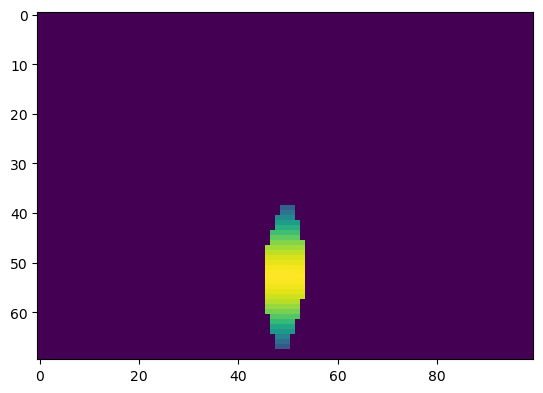

In [22]:
plt.imshow(ray[0])

In [23]:
class NestedCNN(nn.Module):
    def __init__(self, n):
        super(NestedCNN, self).__init__()
        self.n = n
        self.cnn_module = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),  # Modified MaxPool2d layer
            nn.Flatten(),
            nn.Linear(448, 1),
            nn.ReLU(),
            nn.ReLU()
        )

    def forward(self, input):
        outputs = []
        for i in range(self.n):
            nested_input = input[:, i, :, :].unsqueeze(1)
            output = nested_input
            print("Nested Input shape:", output.shape)
            
            output = self.cnn_module[0](output)
            print("Conv2d 1 Output shape:", output.shape)
            
            output = self.cnn_module[1](output)
            print("ReLU 1 Output shape:", output.shape)
            
            output = self.cnn_module[2](output)
            print("MaxPool2d 1 Output shape:", output.shape)
            
            output = self.cnn_module[3](output)
            print("Conv2d 2 Output shape:", output.shape)
            
            output = self.cnn_module[4](output)
            print("ReLU 2 Output shape:", output.shape)
            
            output = self.cnn_module[5](output)
            print("MaxPool2d 2 Output shape:", output.shape)
            
            output = self.cnn_module[6](output)
            print("Conv2d 3 Output shape:", output.shape)
            
            output = self.cnn_module[7](output)
            print("ReLU 3 Output shape:", output.shape)
            
            output = self.cnn_module[8](output)
            print("MaxPool2d 3 Output shape:", output.shape)
            
            output = self.cnn_module[9](output)
            print("Flatten Output shape:", output.shape)

            
            output = self.cnn_module[10](output)
            print("Linear 1 Output shape:", output.shape)
            
            output = self.cnn_module[11](output)
            print("ReLU 4 Output shape:", output.shape)
            
            output = self.cnn_module[12](output)
            print("Relu_Final Output shape:", output.shape)
            
            outputs.append(output)
        
        outputs = torch.stack(outputs, dim=1)
        return outputs


In [55]:
cnn_module= NestedCNN(2)

In [25]:
# Convert the numpy array to a torch tensor
ray_tensor = torch.from_numpy(ray)

# Add a batch dimension to the tensor
ray_tensor = ray_tensor.unsqueeze(0)

In [26]:
ray_tensor.shape

torch.Size([1, 3, 70, 100])

In [192]:
x = torch.randn(10, 2, 70,20)

In [54]:
prob=cnn_module.forward(ray_tensor)

Nested Input shape: torch.Size([1, 1, 70, 100])
Conv2d 1 Output shape: torch.Size([1, 16, 68, 98])
ReLU 1 Output shape: torch.Size([1, 16, 68, 98])
MaxPool2d 1 Output shape: torch.Size([1, 16, 34, 49])
Conv2d 2 Output shape: torch.Size([1, 32, 32, 47])
ReLU 2 Output shape: torch.Size([1, 32, 32, 47])
MaxPool2d 2 Output shape: torch.Size([1, 32, 16, 23])
Conv2d 3 Output shape: torch.Size([1, 64, 14, 21])
ReLU 3 Output shape: torch.Size([1, 64, 14, 21])
MaxPool2d 3 Output shape: torch.Size([1, 64, 7, 21])
Flatten Output shape: torch.Size([1, 9408])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x9408 and 448x1)

In [209]:
prob[0][0].shape

torch.Size([1])

In [183]:
prob.shape

torch.Size([1, 2, 1])

In [142]:
5376*256

1376256

In [ ]:
1376256

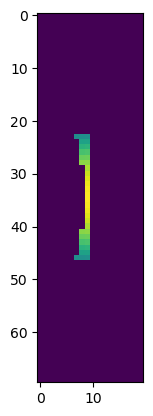

In [197]:
plt.imshow(base_env.RayCast()[1])

In [13]:
from tensordict.nn.distributions import NormalParamExtractor


In [14]:
num_actions = len(base_env.action_space)

In [15]:
num_actions

15

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:


actor_net = nn.Sequential(
    nn.Linear(20, 256, bias=True),
    nn.Tanh(),
    nn.Linear(256, 128, bias=True),
    nn.Tanh(),
    nn.Linear(128, num_actions, bias=True),
    NormalParamExtractor()
).to(device)

In [18]:
actor_net

Sequential(
  (0): Linear(in_features=20, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=15, bias=True)
  (5): NormalParamExtractor()
)

In [19]:
from tensordict.nn import TensorDictModule


In [20]:
in_keys = ['' ,'' ]
policy_module = TensorDictModule(actor_net, in_keys=in_keys, out_keys=["loc", "scale"])


In [21]:
policy_module

TensorDictModule(
    module=Sequential(
      (0): Linear(in_features=20, out_features=256, bias=True)
      (1): Tanh()
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=15, bias=True)
      (5): NormalParamExtractor()
    ),
    device=cuda:0,
    in_keys=['', ''],
    out_keys=['loc', 'scale'])

In [22]:
from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
policy_module = ProbabilisticActor(
    module=policy_module,
    spec=base_env.action_space,
    in_keys=['' ,'' ],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "num_actions": num_actions,
    },
    return_log_prob=True,
)


In [24]:
from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator


In [25]:
policy_module = ProbabilisticActor(
    module=policy_module,
    spec=base_env.action_space,
    in_keys=['' ,'' ],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "num_actions": num_actions,
    },
    return_log_prob=True,
)


demo_params = {
    "module.param1": base_env.RayCast()[0],
    "module.param2": base_env.RayCast()[1],
    # Add more parameter-value pairs as needed
}


# Define the minimum and maximum values for the action space
action_space_min = torch.tensor([-1.0])
action_space_max = torch.tensor([1.0])

# Set the parameters for each module in the ModuleList
for key, value in demo_params.items():
    module_key, param_name = key.split(".", 1)
    module = getattr(policy_module, module_key)
    setattr(module, param_name, value)

policy_module = ProbabilisticActor(
    module=policy_module,
    spec=base_env.action_space,
    in_keys=["loc", "scale"],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "min": action_space_min,
        "max": action_space_max,
    },
    return_log_prob=True
)


In [74]:
# Forward pass through the policy module
with torch.no_grad():
    output = policy_module({raycast})

# Extract the action from the output
action = output['action'].squeeze().item()


RuntimeError: Could not infer dtype of set

In [42]:
# Test the policy module
x = torch.randn(2, 20, 70).to(device)
params = {'param_name': demo_params}  # Replace with actual parameters
policy_module(x, params=params)


AttributeError: 'ModuleList' object has no attribute 'param_name'

In [39]:
x = torch.randn(2, 20, 70).to(device)
params = {'param_name': demo_params}  # Replace with actual parameters

In [40]:
params

{'param_name': {'module.param1': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'module.param2': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}}

In [41]:
# Test the policy module

policy_module(x, params=params)


AttributeError: 'ModuleList' object has no attribute 'param_name'

In [38]:
#test the policy module
x = torch.randn(20,70).to(device)
policy_module(x)

TypeError: It seems you tried to provide the parameters as an argument to the module when the module was not stateless. If this is the case, this error should vanish by providing the parameters using the ``module(..., params=params)`` syntax.

In [26]:
policy_module

ProbabilisticActor(
    module=ModuleList(
      (0): ProbabilisticActor(
          module=ModuleList(
            (0): TensorDictModule(
                module=Sequential(
                  (0): Linear(in_features=20, out_features=256, bias=True)
                  (1): Tanh()
                  (2): Linear(in_features=256, out_features=128, bias=True)
                  (3): Tanh()
                  (4): Linear(in_features=128, out_features=15, bias=True)
                  (5): NormalParamExtractor()
                ),
                device=cuda:0,
                in_keys=['', ''],
                out_keys=['loc', 'scale'])
            (1): SafeProbabilisticModule()
          ),
          device=cuda:0,
          in_keys=[''],
          out_keys=['loc', 'scale', 'action', 'sample_log_prob'])
      (1): SafeProbabilisticModule()
    ),
    device=cuda:0,
    in_keys=[''],
    out_keys=['loc', 'scale', 'action', 'sample_log_prob'])

In [30]:
num_cells=256

In [29]:
value_net = nn.Sequential(
    nn.Linear(20, 256, bias=True),
    nn.Tanh(),
    nn.Linear(256, 128, bias=True),
    nn.Tanh(),
    nn.Linear(128, 1, bias=True),
    NormalParamExtractor()
).to(device)

value_module = ValueOperator(
    module=value_net,
    in_keys= ['' ,'' ],
)


In [30]:
value_module

ValueOperator(
    module=Sequential(
      (0): Linear(in_features=20, out_features=256, bias=True)
      (1): Tanh()
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=1, bias=True)
      (5): NormalParamExtractor()
    ),
    device=cuda:0,
    in_keys=['', ''],
    out_keys=['state_value'])

In [32]:
value_net.to(device)

Sequential(
  (0): Linear(in_features=20, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=1, bias=True)
  (5): NormalParamExtractor()
)

In [33]:
base_env.RayCast()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [35]:
print("Running policy:", policy_module(base_env.RayCast()))

TypeError: It seems you tried to provide the parameters as an argument to the module when the module was not stateless. If this is the case, this error should vanish by providing the parameters using the ``module(..., params=params)`` syntax.

In [54]:

print("Running value:", value_module(base_env.reset()))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [ ]:
base_env.observation_space

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
base_env.to(device)

In [ ]:
base_env.observation_space

In [ ]:
from torchrl.envs import (
    Compose,
    DoubleToFloat,
    ObservationNorm,
    StepCounter,
    TransformedEnv,
)

In [ ]:
env = TransformedEnv(
    base_env,
    Compose(
        ObservationNorm(in_keys=base_env.observation_space),
        DoubleToFloat(in_keys=base_env.observation_space),
        StepCounter(),
    ),
)


In [ ]:
env = UnityEnv(unity_comms,5000)

In [ ]:
from torchrl.envs.utils import check_env_specs, ExplorationType, set_exploration_type

In [ ]:
check = check_env_specs(env)

In [ ]:
# Define the frame skip frequency
frame_skip_frequency = 5

# Define the number of training steps
total_timesteps = 100000

# Define the directory paths
LOG_DIR = './logs/'
OPT_DIR = './opt_modeldata/'
CHECKPOINT_DIR = './train_modeldata/'

# Create the directories if they don't exist
os.makedirs(LOG_DIR, exist_ok=True)
os.makedirs(OPT_DIR, exist_ok=True)
os.makedirs(CHECKPOINT_DIR, exist_ok=True)


In [ ]:
# Import optuna for HPO
import optuna
# Import PPO for algos
from stable_baselines3 import PPO
# Evaluate Policy
from stable_baselines3.common.evaluation import evaluate_policy
# Import wrappers
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import os
LOG_DIR = './logs/'
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)

OPT_DIR = './opt_modeldata/'
if not os.path.exists(OPT_DIR):
    os.makedirs(OPT_DIR)



In [ ]:
# #https://github.com/araffin/rl-baselines-zoo/issues/29
def optimize_ppo(trial):
    """ Learning hyperparamters we want to optimise"""
    return {
        'n_steps': trial.suggest_int('n_steps', 2048, 20480),
        'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range': trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda': trial.suggest_uniform('gae_lambda', 0.8, .99)
    }



In [ ]:
1024*20

In [ ]:

def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial)
        env = UnityEnv(unity_comms,5000)
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')
        model = PPO('MlpPolicy', env,batch_size=1024, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=20480)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()
        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)
        return mean_reward
    except Exception as e: 
        return -1000


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=5, n_jobs=1)
model_params = study.best_params


In [ ]:


import os
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

CHECKPOINT_DIR = './train_modeldata/'
if not os.path.exists(CHECKPOINT_DIR):
    os.makedirs(CHECKPOINT_DIR)

callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

env = UnityEnv(unity_comms, 5000)
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

model = PPO('MlpPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

# Adjust the total timesteps
total_timesteps = 20480 

model.learn(total_timesteps=total_timesteps, callback=callback)
